p: The lag order, representing the number of lag observations incorporated in the model.
d: Degree of differencing, denoting the number of times raw observations undergo differencing.
q: Order of moving average, indicating the size of the moving average window.

In [5]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<ipython-input-5-6c3d7c2c087a>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/channingpitts/Desktop/DS 4002/Project2-DS-4002/DATA/data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Min Temp

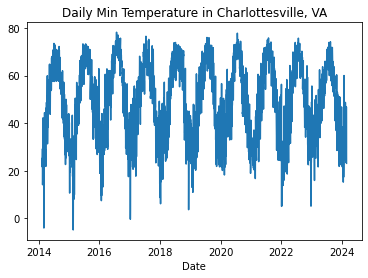

In [3]:
# Plot the time series
plt.plot(data['min_temp'])
plt.title('Daily Min Temperature in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

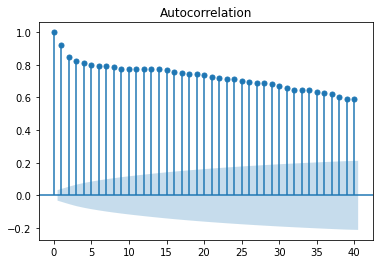

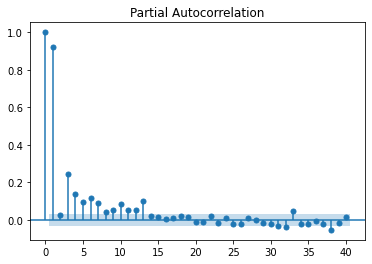

In [6]:
# finding parameters
plot_acf(data['min_temp'], lags=40)
plot_pacf(data['min_temp'], lags=40)
plt.show()

In [7]:
# building the ARIMA model
model = ARIMA(data['min_temp'], order=(3, 1, 0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [8]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


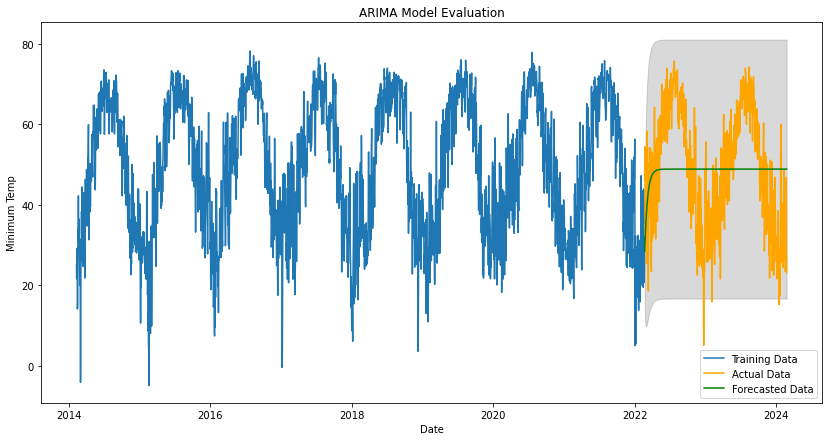

RMSE: 14.787507565575009


In [9]:
# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['min_temp'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['min_temp'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['min_temp'], label='Training Data')
plt.plot(test['min_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Minimum Temp')
plt.legend()
plt.show()

print('RMSE:', rmse)

# Mean Temp

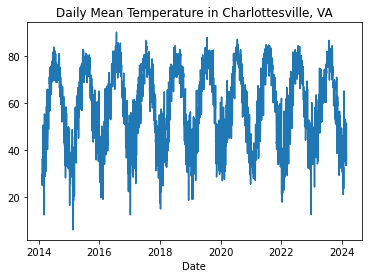

In [10]:
# Plot the time series
plt.plot(data['mean_temp'])
plt.title('Daily Mean Temperature in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

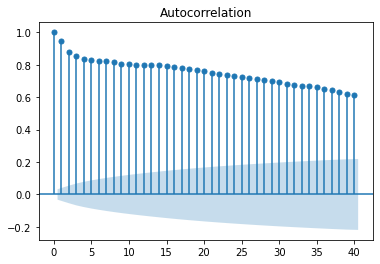

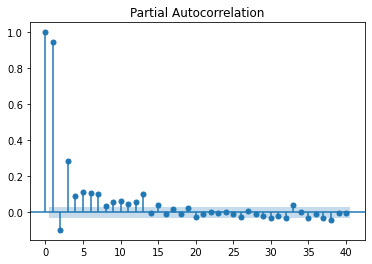

In [11]:
# finding parameters

plot_acf(data['mean_temp'], lags=40)
plot_pacf(data['mean_temp'], lags=40)
plt.show()

In [12]:
# building the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['mean_temp'], order=(3, 1, 0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [13]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


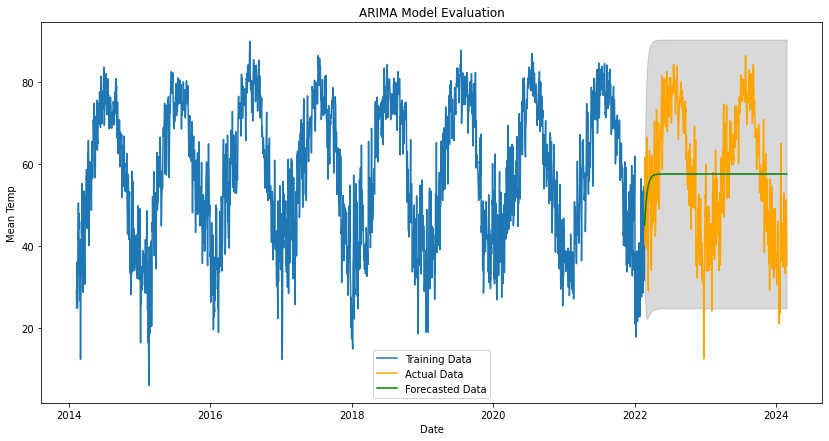

RMSE: 15.302368959212991


In [14]:
# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['mean_temp'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['mean_temp'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['mean_temp'], label='Training Data')
plt.plot(test['mean_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.legend()
plt.show()

print('RMSE:', rmse)

# Sunrise

In [15]:
# Plot the time series
plt.plot(data['sunrise'])
plt.title('Daily Sunrise in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

KeyboardInterrupt: 

In [ ]:
# finding parameters
plot_acf(data['sunrise'], lags=40)
plot_pacf(data['sunrise'], lags=40)
plt.show()

In [ ]:
# building the ARIMA model
model = ARIMA(data['sunrise'], order=(1,0,1))
model_fit = model.fit()

In [ ]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

In [ ]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['total_precip'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_precip'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_precip'], label='Training Data')
plt.plot(test['total_precip'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

print('RMSE:', rmse)

# Total Precipitation

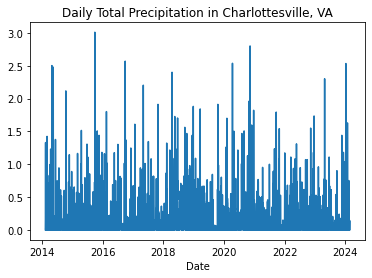

In [16]:
# Plot the time series
plt.plot(data['total_precip'])
plt.title('Daily Total Precipitation in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

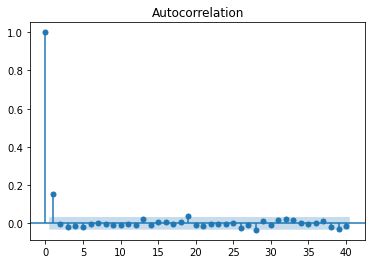

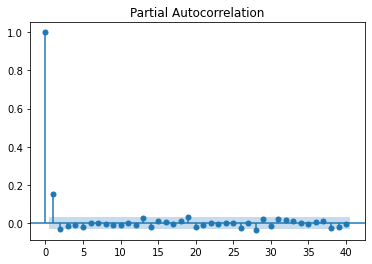

In [17]:
# finding parameters
plot_acf(data['total_precip'], lags=40)
plot_pacf(data['total_precip'], lags=40)
plt.show()

In [18]:
# building the ARIMA model
model = ARIMA(data['total_precip'], order=(2,1,0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [19]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


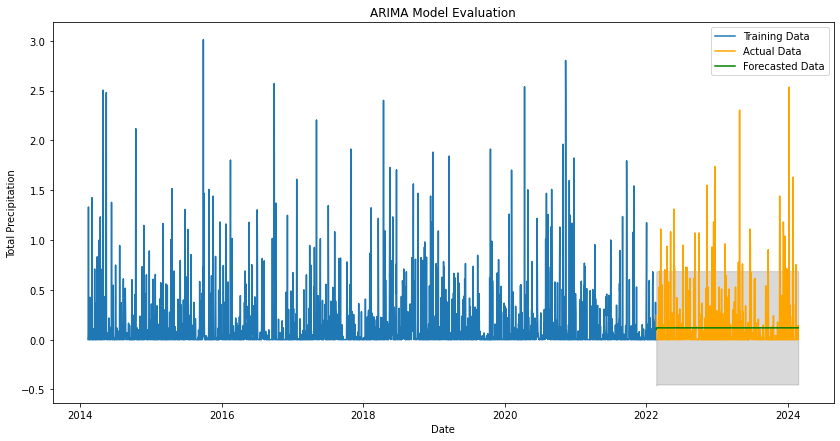

RMSE: 0.26748214073319904


In [20]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['total_precip'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_precip'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_precip'], label='Training Data')
plt.plot(test['total_precip'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

print('RMSE:', rmse)

# Snow

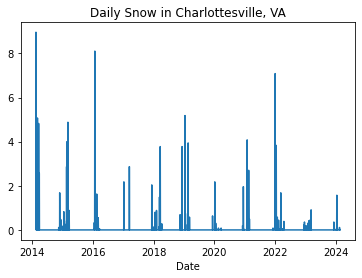

In [21]:
# Plot the time series
plt.plot(data['snow'])
plt.title('Daily Snow in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

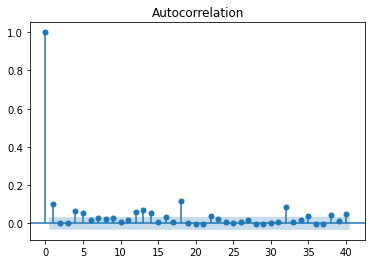

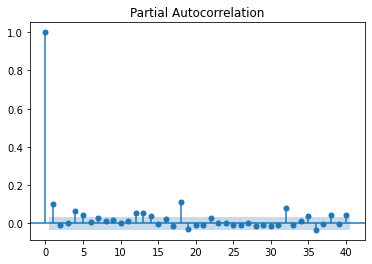

In [22]:
# finding parameters
plot_acf(data['snow'], lags=40)
plot_pacf(data['snow'], lags=40)
plt.show()

In [23]:
# building the ARIMA model
model = ARIMA(data['snow'], order=(1,1,0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [24]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


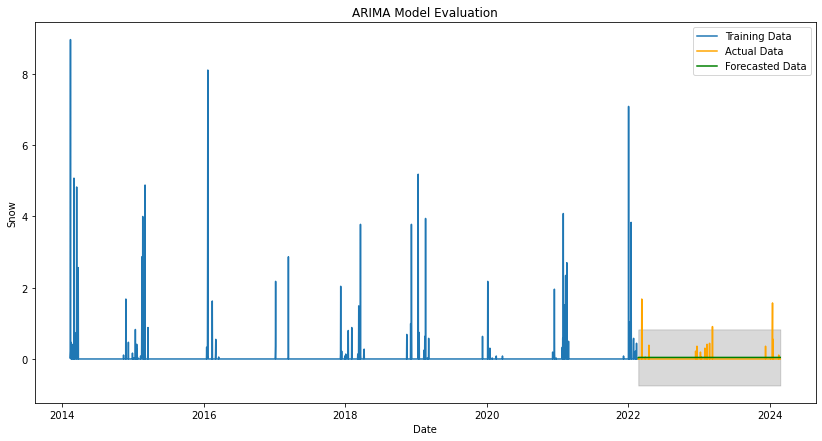

RMSE: 0.1118095186926767


In [25]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['snow'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['snow'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['snow'], label='Training Data')
plt.plot(test['snow'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Snow')
plt.legend()
plt.show()

print('RMSE:', rmse)